In [1]:
!pip install --upgrade openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.5/383.5 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 16.5 MB/s eta 0:00:00


This command is used to install or upgrade the OpenAI Python library using pip, which is the package installer for Python. Let's break it down:

- `!` at the beginning is typically used in Jupyter notebooks to run shell commands. In a regular Python environment or command line, you would omit this.

- `pip` is the package management system used to install and manage software packages written in Python.

- `install` is the pip command to install a package.

- `--upgrade` is an option that tells pip to upgrade the package to the latest version if it's already installed. If the package isn't installed, it will simply install the latest version.

- `openai` is the name of the package being installed or upgraded. This is the official Python client library for the OpenAI API, which allows developers to interact with various OpenAI services like GPT-3, DALL-E, and others.

By running this command, you're ensuring that you have the latest version of the OpenAI Python library installed in your Python environment. This is often important to access the most recent features and bug fixes in the OpenAI API client.


In [2]:
from openai import OpenAI
from kaggle_secrets import UserSecretsClient
import time 
import IPython
import requests 
import os  
from PIL import Image



```python
from openai import OpenAI
```
This line imports the OpenAI class from the openai module. It's used to interact with OpenAI's API, likely for tasks like generating text or images.

```python
from kaggle_secrets import UserSecretsClient
```
This imports the UserSecretsClient from kaggle_secrets. It's used to securely access user secrets (like API keys) in Kaggle notebooks.

```python
import time
```
This imports the time module, which provides various time-related functions. It's often used for adding delays or measuring execution time.

```python
import IPython
```
This imports the IPython module, which provides tools for interactive computing in Python. It's commonly used in Jupyter notebooks for enhanced display and interaction.

```python
import requests
```
This imports the requests library, which is used for making HTTP requests. It's helpful for interacting with web APIs.

```python
import os
```
This imports the os module, which provides a way to use operating system dependent functionality like reading or writing to the file system.

```python
from PIL import Image
```
This imports the Image class from the PIL (Python Imaging Library) module. PIL is used for opening, manipulating, and saving many different image file formats.


In [3]:
user_secrets = UserSecretsClient()

client = OpenAI(api_key=user_secrets.get_secret("openaivision"))

This code is setting up authentication to use the OpenAI API, specifically in a Kaggle environment. Let's examine it line by line:

1. `user_secrets = UserSecretsClient()`
   - This line creates an instance of the `UserSecretsClient` class.
   - In Kaggle, this client is used to securely access user secrets, which are sensitive pieces of information like API keys that you don't want to expose in your code.

2. `client = OpenAI(api_key=user_secrets.get_secret("openaivision"))`
   - This line creates an instance of the OpenAI client, which will be used to interact with OpenAI's API.
   - The `api_key` parameter is being set using a secret retrieved from Kaggle's secret management system.
   - `user_secrets.get_secret("openaivision")` retrieves a secret named "openaivision" from your Kaggle secrets. This is presumably your OpenAI API key.

Overall, this code is setting up a secure way to use your OpenAI API key in a Kaggle notebook environment. It allows you to keep your API key secret while still being able to use it in your code to authenticate with OpenAI's services.


In [4]:
# set the prompt
prompt = "Product photography, a glass ball perfume sitting on top of a tree branch,\
        with white flowers, romanticism, blue iris, beautiful lighting and shadow,\
        45 degree upward viewing angle, 4k, HD, clear details"

In [5]:
generation_response = client.images.generate(
    model = "dall-e-3",
    prompt=prompt,
    n=1,
    size="1024x1024",
    response_format="url",
)

print(generation_response)

ImagesResponse(created=1728305092, data=[Image(b64_json=None, revised_prompt="Picture a high-definition photograph, with a resolution of 4k, executed in a romanticism style. Vividly imagine a gracefully shaded crystal perfume bottle shaped like a spherical glass ball. It's perched delicately atop a sturdy tree branch with an array of brilliantly white flowers nestled among the leaves. Beneath it, a blue iris blooms, casting a soothing contrast with the overall setting. The perspective is from a 45-degree upward viewing angle, providing an intriguing view of this setup and enhancing the beautiful play of light and shadow to reveal all the clear details.", url='https://oaidalleapiprodscus.blob.core.windows.net/private/org-9gkTKEQ9wI8vGwHiqAoTIyb4/user-zQpPYryAUR2y615rTucDjXWc/img-5iI0i4uzbULIumJbidfXJZHJ.png?st=2024-10-07T11%3A44%3A52Z&se=2024-10-07T13%3A44%3A52Z&sp=r&sv=2024-08-04&sr=b&rscd=inline&rsct=image/png&skoid=d505667d-d6c1-4a0a-bac7-5c84a87759f8&sktid=a48cca56-e6da-484e-a814-9c


1. `client.images.generate()`: This method call generates images using the OpenAI API.

2. Parameters:
   - `model="dall-e-3"`: Specifies the use of the DALL-E 3 model for image generation.
   - `prompt=prompt`: The text prompt describing the image to be generated. (The `prompt` variable should be defined elsewhere in your code.)
   - `n=1`: Requests the generation of 1 image.
   - `size="1024x1024"`: Sets the size of the generated image to 1024x1024 pixels.
   - `response_format="url"`: Specifies that the API should return a URL to the generated image rather than the image data itself.

3. `print(generation_response)`: This prints the response from the API call, which likely includes the URL of the generated image and possibly other metadata.


In [6]:
# set a directory to save DALL·E images to
image_dir_name = "images"
image_dir = os.path.join(os.curdir, image_dir_name)

# create the directory if it doesn't yet exist
if not os.path.isdir(image_dir):
    os.mkdir(image_dir)

# sanity check: print the directory to save to
print(f"{image_dir=}")

image_dir='./images'



1. `image_dir_name = "images"` sets the name of the directory where images will be saved.
2. `os.path.join(os.curdir, image_dir_name)` creates a path to this directory:
   - `os.curdir` represents the current directory ('.').
   - This joins the current directory path with "images", creating a path like "./images".


3. `os.path.isdir(image_dir)` checks if the directory already exists.
4. If it doesn't exist, `os.mkdir(image_dir)` creates the directory.

5. This line prints the value of `image_dir` using an f-string with the `=` specifier, which will output both the variable name and its value.

In summary, this code sets up a directory named "images" in the current working directory to save DALL·E generated images. It creates this directory if it doesn't already exist, and then prints the path to confirm where images will be saved. This is a common pattern for ensuring a specific directory exists before saving files to it.

In [7]:
# save the image

generated_image_url = generation_response.data[0].url 
generated_image = requests.get(generated_image_url).content  


generated_image_name = "generated_image.png" 
generated_image_filepath = os.path.join(image_dir, generated_image_name)


with open(generated_image_filepath, "wb") as image_file:
    image_file.write(generated_image)  



1. `generated_image_url = generation_response.data[0].url`
   - This extracts the URL of the generated image from the API response.
   - It assumes the response contains a `data` list with at least one item, and that item has a `url` attribute.

2. `generated_image = requests.get(generated_image_url).content`
   - This sends a GET request to the URL of the generated image.
   - `.content` retrieves the raw binary content of the response, which is the image data.

3. `generated_image_name = "generated_image.png"`
   - This sets the filename for the image to be saved.

4. `generated_image_filepath = os.path.join(image_dir, generated_image_name)`
   - This creates the full file path where the image will be saved.
   - It joins the directory path (`image_dir`) with the filename (`generated_image_name`).

5. ```python
   with open(generated_image_filepath, "wb") as image_file:
       image_file.write(generated_image)
   ```
   - This opens a new file at the specified filepath in binary write mode ("wb").
   - It then writes the image content to this file.
   - The `with` statement ensures that the file is properly closed after writing.

In summary, this code retrieves the generated image from the URL provided in the API response, and saves it as a PNG file in the previously defined image directory. The image is saved with the name "generated_image.png".

./images/generated_image.png


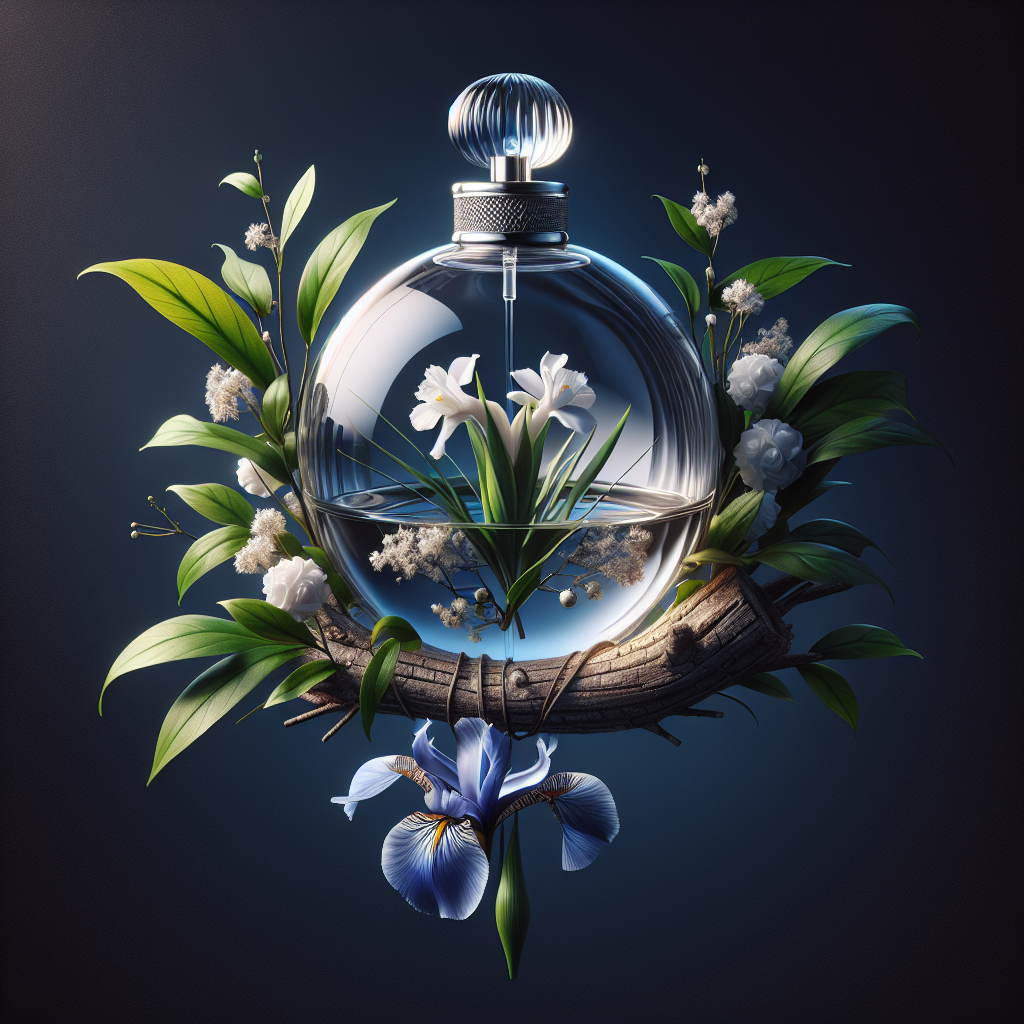

In [8]:
print(generated_image_filepath)
display(Image.open(generated_image_filepath))